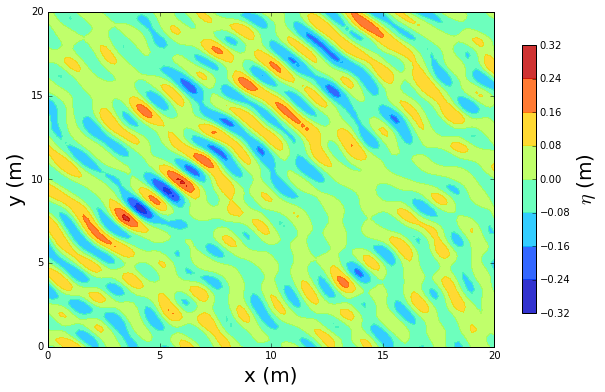

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
from proteus.WaveTools import DirectionalWaves, RandomWaves
from proteus.SpatialTools import rotation3D 
import numpy as np

n=101
xi = np.linspace(0, 20, n)
yi = np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)

M = 50
Tp = 2. 
Hs = 0.1
depth = 1.
mwl = 0.
N = 51
bandFactor = 2.0
g=np.array([0., 0., -9.81])
spectName = "JONSWAP"
spreadName = "cos2s"
spectral_params = None
spread_params = {"s":15}
phi = None
phiSymm = False
waveDir0 = np.array([1., 1., 0.])

DW = DirectionalWaves(M,
                      Tp,
                      Hs,
                      mwl,
                      depth,
                      waveDir0,
                      g,
                      N,
                      bandFactor,
                      spectName,
                      spreadName,
                      spectral_params,
                      spread_params,
                      phi,
                      phiSymm
                     )


for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = DW.eta(x, 0.)
        
plt.figure(figsize=(10,6), dpi=100)
X,Y = np.meshgrid(xi, yi)

CS = plt.contourf(X, Y, eta_t, 8, alpha=0.8, cmap='jet')

plt.xlabel("x (m)", size=20)
plt.ylabel("y (m)", size=20)

CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 20)

plt.show()

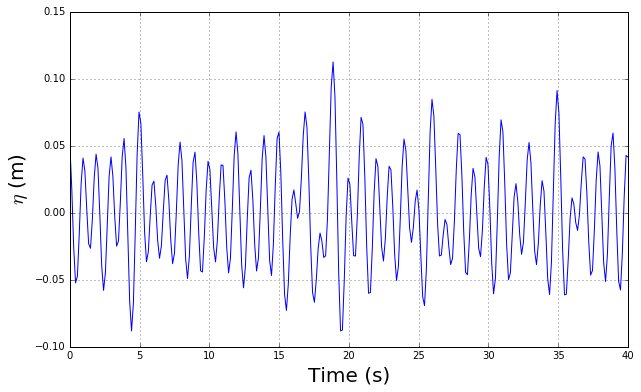

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
from proteus.WaveTools import DirectionalWaves, RandomWaves
from proteus.SpatialTools import rotation3D 
import numpy as np

n=300

eta_t = np.zeros(n)

M = 50
Tp = 2. 
Hs = 0.1
depth = 1.
mwl = 0.
N = 101
bandFactor = 2.0
g=np.array([0., 0., -9.81])
spectName = "JONSWAP"
spreadName = "cos2s"
spectral_params = None
spread_params = {"s":15}
phi = None
phiSymm = False
waveDir0 = np.array([1., 1., 0.])

DW = DirectionalWaves(M,
                      Tp,
                      Hs,
                      mwl,
                      depth,
                      waveDir0,
                      g,
                      N,
                      bandFactor,
                      spectName,
                      spreadName,
                      spectral_params,
                      spread_params,
                      phi,
                      phiSymm
                     )

tnlist=np.linspace(0, 20*Tp, n)
    
for i in range(len(tnlist)):
    x = [2., 0.5, 0.]
    t = tnlist[i]
    eta_t[i] = DW.eta(x, t)
    

plt.figure(figsize=(10,6), dpi=100)

plt.xlim(0., 20*Tp)
plt.plot(tnlist, eta_t)

plt.xlabel("Time (s)", size=20)
plt.ylabel("$\eta$ (m)", size=20)
plt.grid()
plt.show()